## Detectron2 beginner tutorial

### Some basic setup

In [1]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import os
from matplotlib.pyplot import figure
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

### Inference with pre-trained models

In [2]:
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg

In [3]:
im = cv2.imread("./input.jpg")

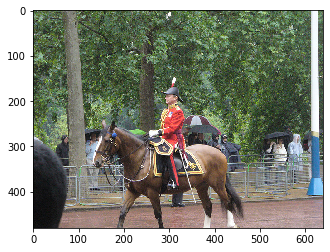

In [4]:
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [5]:
cfg = get_cfg()
cfg.merge_from_file("/home/ubuntu/gfav/repos/detectron2/configs/COCO-Detection/retinanet_R_101_FPN_3x.yaml")
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can either use the https://dl.fbaipublicfiles.... url, or use the following shorthand
cfg.MODEL.WEIGHTS = "/home/ubuntu/gfav/repos/detectron2/pretrained_models/RetinaNet/model_final_59f53c.pkl"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

Loading config ../repos/detectron2/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


WARNING [11/08 14:49:15 d2.config.compat]: Config '../repos/detectron2/configs/COCO-Detection/retinanet_R_101_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [6]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes 
outputs["instances"].pred_boxes 
outputs["instances"].scores 

tensor([0.9706, 0.8747, 0.8653, 0.7662, 0.7455, 0.7374, 0.7038, 0.6823, 0.6515,
        0.5969, 0.5468], device='cuda:0')

In [7]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


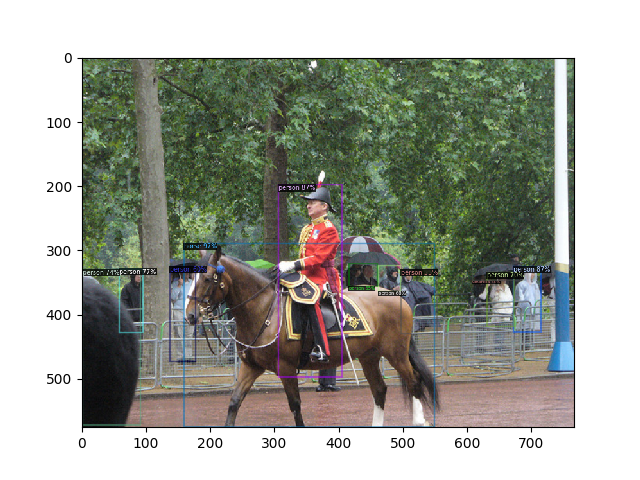

In [9]:
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

In [10]:
outputs

{'instances': Instances(num_instances=11, image_height=480, image_width=640, fields=[pred_boxes = Boxes(tensor([[132.5937, 242.2938, 457.8400, 479.7706],
         [254.9828, 166.5730, 337.7393, 414.8047],
         [559.9357, 271.7328, 595.5008, 356.8928],
         [ 48.7343, 275.0825,  79.3479, 358.1465],
         [506.9619, 266.9182, 569.6402, 290.6413],
         [  0.6501, 275.9706,  75.4222, 477.1220],
         [525.4608, 279.8608, 561.1824, 349.8389],
         [385.1291, 271.3568, 413.2227, 304.3592],
         [346.3119, 268.7670, 383.6153, 298.0082],
         [114.2905, 272.0125, 147.8336, 394.7779],
         [414.0936, 276.1142, 460.5254, 359.3415]], device='cuda:0')), scores = tensor([0.9706, 0.8747, 0.8653, 0.7662, 0.7455, 0.7374, 0.7038, 0.6823, 0.6515,
         0.5969, 0.5468], device='cuda:0'), pred_classes = tensor([17,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0], device='cuda:0'), ])}

In [12]:
cfg

CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'RetinaNet', 'WEIGHTS': '/home/ubuntu/gfav/repos/detectron2/pretrained_models/RetinaNet/model_final_59f53c.pkl', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'build_retinanet_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32, 40.31747359663594, 50.79683366298238], [64, 80.63494719327188, 101.59366732596476], [128, 161.26989438654377, 203.18733465192952], [256, 322.53978877308754, 406.37466930385904], [512, 645.0795775461751, 812.7493386077181]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]]}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHea

### Training RetinaNet 

In [1]:
# python tools/train_net.py --config-file configs/PascalVOC-Detection/retinanet_R_101_FPN_3x.yaml SOLVER.IMS_PER_BATCH 2 SOLVER.BASE_LR 0.01

### Inference with RetinaNet trained on PascalVOC

<IPython.core.display.Javascript object>


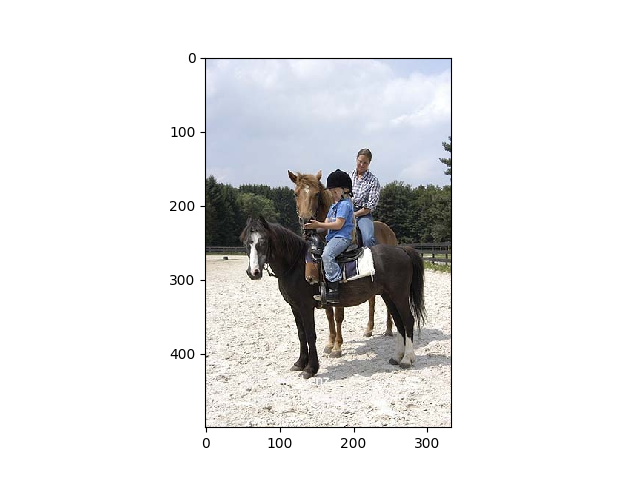

In [17]:
im = cv2.imread("/home/ubuntu/gfav/repos/detectron2/datasets/VOC2007/JPEGImages/002596.jpg")
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [18]:
cfg = get_cfg()
cfg.merge_from_file("/home/ubuntu/gfav/repos/detectron2/configs/PascalVOC-Detection/retinanet_R_101_FPN_3x.yaml")
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can either use the https://dl.fbaipublicfiles.... url, or use the following shorthand
cfg.MODEL.WEIGHTS = "/home/ubuntu/gfav/repos/detectron2/output_pascalvoc_exp2/model_final.pth"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

Loading config ../repos/detectron2/configs/PascalVOC-Detection/../Base-RetinaNet-VOC.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


WARNING [11/12 13:47:29 d2.config.compat]: Config '../repos/detectron2/configs/PascalVOC-Detection/retinanet_R_101_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [7]:
cfg

CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'RetinaNet', 'WEIGHTS': '/home/ubuntu/gfav/repos/detectron2/output_pascalvoc_exp2/model_final.pth', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'build_retinanet_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32, 40.31747359663594, 50.79683366298238], [64, 80.63494719327188, 101.59366732596476], [128, 161.26989438654377, 203.18733465192952], [256, 322.53978877308754, 406.37466930385904], [512, 645.0795775461751, 812.7493386077181]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]]}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHead', 'IN_FEATU

In [19]:
outputs

{'instances': Instances(num_instances=4, image_height=500, image_width=332, fields=[pred_boxes = Boxes(tensor([[119.2758, 150.1148, 204.8802, 326.9648],
         [190.8268, 123.7148, 239.3992, 264.5460],
         [ 53.8621, 206.9271, 297.9763, 430.4082],
         [101.5940, 153.3645, 252.6088, 381.7704]], device='cuda:0')), scores = tensor([0.9080, 0.8556, 0.8339, 0.5591], device='cuda:0'), pred_classes = tensor([14, 14, 12, 12], device='cuda:0'), ])}

In [20]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

<IPython.core.display.Javascript object>


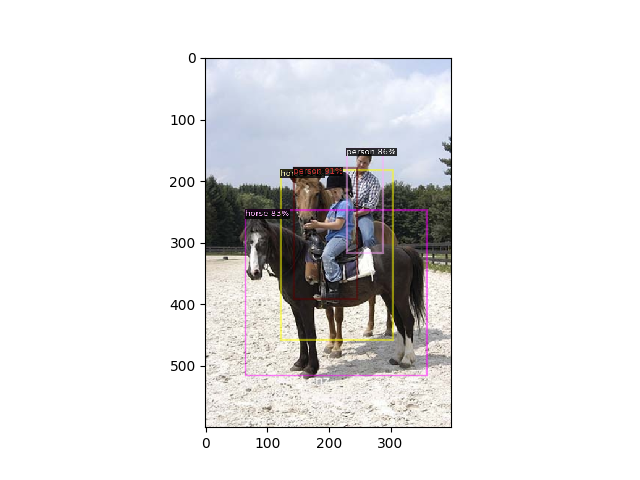

In [21]:
%matplotlib notebook
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

### Inference with RetinaNet trained on idler data

In [2]:
cfg = get_cfg()
cfg.merge_from_file("/home/ubuntu/gfav/repos/detectron2/configs/PascalVOC-Detection/retinanet_R_101_FPN_3x.yaml")
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can either use the https://dl.fbaipublicfiles.... url, or use the following shorthand
cfg.MODEL.WEIGHTS = "/home/ubuntu/gfav/repos/detectron2/output_idler_exp1/model_final.pth"
predictor = DefaultPredictor(cfg)

Loading config /home/ubuntu/gfav/repos/detectron2/configs/PascalVOC-Detection/../Base-RetinaNet-VOC.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


WARNING [11/13 14:36:39 d2.config.compat]: Config '/home/ubuntu/gfav/repos/detectron2/configs/PascalVOC-Detection/retinanet_R_101_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [3]:
%matplotlib inline
with open('/home/ubuntu/gfav/repos/detectron2/datasets/VOC2007/ImageSets/Main/test.txt') as f:
    content = f.readlines()
content = [x.strip() for x in content] 
for im_name in content:
    im = cv2.imread("/home/ubuntu/gfav/repos/detectron2/datasets/VOC2007/JPEGImages/" + im_name + '.jpg')
    outputs = predictor(im)
    # We can use `Visualizer` to draw the predictions on the image.
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
    cv2.imwrite('/home/ubuntu/gfav/data/phase2/exp1_results/' + im_name + '.jpg', v.get_image()[:, :, ::-1])
#     plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
#     plt.show()
#     break

/home/ubuntu/anaconda3/envs/conda_env_py3_detectron2/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>